In [12]:
import pandas as pd

import matplotlib.pyplot as plt

In [15]:
irisdf = pd.read_csv('iris.csv')
irisdf.shape

(150, 5)

In [16]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
tempdf = irisdf.iloc[:,:-1].values
tempdf

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [45]:
# Using the dendrogram to find the optimal numbers of clusters. 

# First thing we're going to do is to import scipy library. scipy is an open source 
# Python library that contains tools to do hierarchical clustering and building dendrograms.
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean distances')

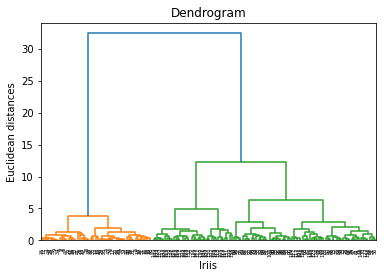

In [46]:
#Lets create a dendrogram variable 
# linkage is actually the algorithm itself of hierarchical clustering and then in 
#linkage we have to specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(tempdf, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Iriis')
plt.ylabel('Euclidean distances')

In [48]:
#4 Fitting hierarchical clustering to the Iris dataset
# There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our 
# algorithm class  
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
# Lets try to fit the hierarchical clustering algorithm  to dataset X while creating the 
# clusters vector that tells for each customer which cluster the customer belongs to.
y_hc=hc.fit_predict(tempdf)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

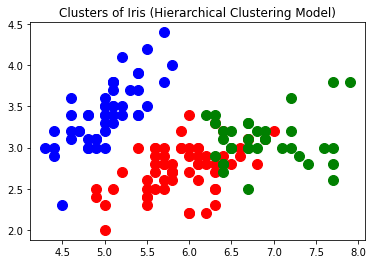

In [49]:
#5 Visualizing the clusters. This code is similar to k-means visualization code.
#We only replace the y_kmeans vector name to y_hc for the hierarchical clustering 
plt.scatter(tempdf[y_hc==0, 0], tempdf[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(tempdf[y_hc==1, 0], tempdf[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(tempdf[y_hc==2, 0], tempdf[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
#plt.scatter(tempdf[y_hc==3, 0], tempdf[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
#plt.scatter(tempdf[y_hc==4, 0], tempdf[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Iris (Hierarchical Clustering Model)')
plt.show()